<div class="alert alert-success">
<h2>Комментарий ревьюера V.2</h2>

Спасибо, что поправил. Удачи в следующих спринтах ✌
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>
    
Привет! Меня зовут Алексей Тюрин, я буду делать ревью твоей работы. Давай будем общаться на «ты».

У тебя хорошая, аккуратная работа 👍. Есть небольшая неточность с округлением интернет-трафика, и в конце надо дополнить вывод. В остальном всё здорово, можешь посмотреть комментарии и задать вопросы, если есть :)


Зелёным цветом отмечены комментарии, формально не требующие правки, но правки приветствуются. Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому или можно поправить прямо сейчас.

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее». Если оставляешь комментарии на какой-то итерации ревью, пиши что-то вроде `комментарий студента V.номер итерации`
</div>

Цвет можно сделать, например, так

<div class = "alert alert-info" >
<h2>Комментарий студента</h2>
Ревьюер душнила :)
</div>

Или так:
    
<div class="alert alert-info" style="background:pink;color:#A91E69">
<h2>Комментарий студента </h2>
    ...
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

**Шаг 1. Откройте файл с данными и изучите общую информацию**

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

**Calls**

In [3]:
calls.info()
calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


**Internet**

In [4]:
internet.info()
internet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Тут можно заметить столбец `Unnamed: 0`, он возникает, когда данные сохраняют с указанием индекса `pd.DataFrame().to_csv(..., index=column)`. Если при чтении указать этот столбец `pd.read_csv(..., index_col=0)` - данные сразу прочитаются корректно.
</div>

**Messages**

In [5]:
messages.info()
messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


**Tariffs**

In [6]:
tariffs.info()
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Users**

In [7]:
users.info()
users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


**Шаг 2. Подготовьте данные**

**Приведем даты к правильному типу данных:**

In [8]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

**Добавим столбец Month в файлы Calls, Internet, Messages**

In [9]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Чтобы так выделять месяц, надо быть уверенным, что все сессии были в пределах одного года, иначе метод склеит месяцы для разных лет в один. Можно либо руками проверить, что всё ок, либо пользоваться `astype('datetime64[M]')` -- он вернёт месяц вместе с годом
</div>

In [10]:
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


In [11]:
internet

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


In [12]:
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [13]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Добавим столбец включенных Гб в месяц:

In [14]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] /1024
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


**Рассмотрим данные о звонках и интернет-трафике - их нужно округлить до большего значения**

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Все графики лучше подписывать, как названия так и оси
</div>

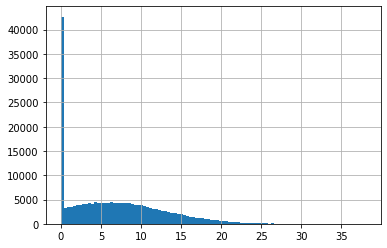

In [15]:
calls['duration'].hist(bins=100)

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

`np.ceil`, кстати, можно применять сразу к столбцу
</div>

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12
202603,1499_216,2018-10-18,19.0,1499,10
202604,1499_217,2018-11-10,11.0,1499,11
202605,1499_218,2018-10-06,5.0,1499,10


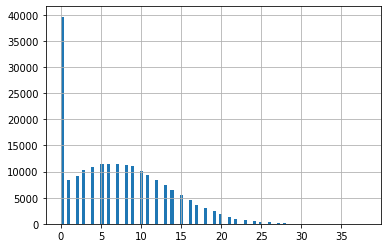

In [16]:
#Округлим нулевые значения, нулевые значения в звонках удалять нельзя - согласно заданию это недозвон:
calls['duration'] = calls['duration'].apply(np.ceil)
display(calls)
calls['duration'].hist(bins=100)

In [17]:
calls.query('duration == 0.0')

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
5,1000_5,2018-11-02,0.0,1000,11
6,1000_6,2018-10-18,0.0,1000,10
9,1000_9,2018-08-15,0.0,1000,8
...,...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499,12
202592,1499_205,2018-10-13,0.0,1499,10
202593,1499_206,2018-12-26,0.0,1499,12
202594,1499_207,2018-10-28,0.0,1499,10


39613 неудавшихся звонков (пропущенные, недозвонишвиеся, занято и т.п.)

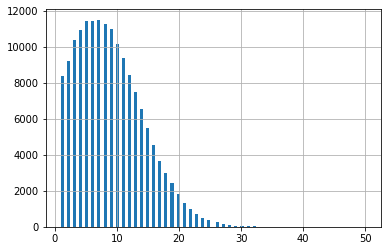

In [18]:
#Построим более наглядную гистограмму без пропущенных звонков:
calls['duration'].hist(bins=100, range = (1,50))

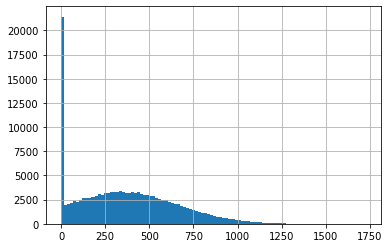

In [19]:
internet['mb_used'].hist(bins=100)

<div class="alert alert-danger">
<h2>Комментарий ревьюера</h2>

"Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта."
    
Т.е. сначала надо сложить, потом поделить на 1024 и округлить вверх

</div>

<div class="alert alert-info" style="background:pink;color:#A91E69">
<h2>Комментарий студента </h2>
    Добавил Гб в объединенной таблице
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера V.2</h2>

👍
</div>

,id,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,11
1,1000_1,1053.0,2018-09-07,1000,9
2,1000_2,1198.0,2018-06-25,1000,6
3,1000_3,551.0,2018-08-22,1000,8
4,1000_4,303.0,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,319.0,2018-10-03,1499,10
149392,1499_153,491.0,2018-12-14,1499,12
149393,1499_154,0.0,2018-10-27,1499,10
149394,1499_155,1247.0,2018-11-26,1499,11


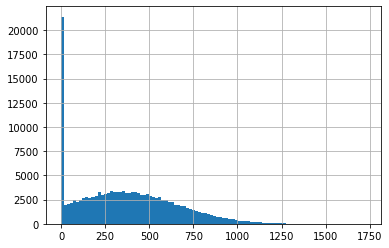

In [20]:
#Округляем данные по израсходованному трафику в мегабайтах:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
display(internet)
internet['mb_used'].hist(bins=100)

In [21]:
internet.query('mb_used == 0')

,id,mb_used,session_date,user_id,month
11,1000_11,0.0,2018-08-28,1000,8
38,1000_38,0.0,2018-11-27,1000,11
46,1000_46,0.0,2018-06-30,1000,6
67,1000_67,0.0,2018-06-16,1000,6
72,1000_72,0.0,2018-06-15,1000,6
...,...,...,...,...,...
149380,1499_141,0.0,2018-12-11,1499,12
149381,1499_142,0.0,2018-11-01,1499,11
149383,1499_144,0.0,2018-11-27,1499,11
149386,1499_147,0.0,2018-10-21,1499,10


19598 строк с нулевым значением, удалим их, т.к. они не нужны для дальнейшего анализа (за них не взимается плата по тарифу, и в описании к проекту по поводу нулевых значений в трафике ничего не сказано)

,id,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,11
1,1000_1,1053.0,2018-09-07,1000,9
2,1000_2,1198.0,2018-06-25,1000,6
3,1000_3,551.0,2018-08-22,1000,8
4,1000_4,303.0,2018-09-24,1000,9
...,...,...,...,...,...
149390,1499_151,753.0,2018-10-11,1499,10
149391,1499_152,319.0,2018-10-03,1499,10
149392,1499_153,491.0,2018-12-14,1499,12
149394,1499_155,1247.0,2018-11-26,1499,11


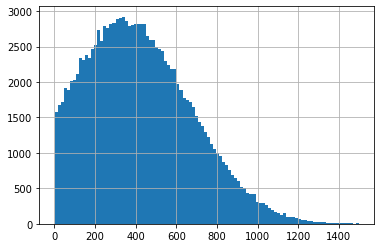

In [22]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()
internet['mb_used'].hist(bins=100, range=(1, 1500))
display(internet)

Добавим столбец Name в файл Users

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Пробелов можно было бы добавить для читаемости :)
</div>

In [23]:
users['name'] = users['city'] + ' ' + users['first_name'] + ' ' + users['last_name']
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,name
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Краснодар Рафаил Верещагин
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,Москва Иван Ежов
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,Стерлитамак Евгений Абрамович
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,Москва Белла Белякова
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,Новокузнецк Татьяна Авдеенко
...,...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,Иркутск Авксентий Фокин
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,Вологда Трифон Блохин
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,Челябинск Каролина Агеева
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,Владикавказ Всеволод Акимчин


<div class="alert alert-info" style="background:pink;color:#A91E69">
<h2>Комментарий студента </h2>
    Добавил пробелы
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера V.2</h2>

👍
</div>

Создадим сводные таблицы по звонкам, смс, интернет-трафику

In [24]:
calls_t = calls.merge(users, on='user_id', how='outer')
calls_grpd = calls_t.pivot_table(values=['name', 'duration'], 
                       index=['user_id', 'month'], 
                       aggfunc={'name': 'count', 'duration': 'sum'})
calls_grpd.columns = ['duration', 'calls'] 
calls_grpd

duration  calls
user_id month                 
1000    5.0       159.0     22
        6.0       172.0     43
        7.0       340.0     47
        8.0       408.0     52
        9.0       466.0     58
...                 ...    ...
1498    10.0      247.0     41
1499    9.0        70.0      9
        10.0      449.0     68
        11.0      612.0     74
        12.0      492.0     69

[3174 rows x 2 columns]

In [25]:
messages_t = messages.merge(users, on='user_id', how='outer')
messages_grpd = messages_t.pivot_table(values='name', 
                       index=['user_id', 'month'], 
                       aggfunc={'name': 'count'})
messages_grpd.columns = ['messages']
messages_grpd

messages
user_id month          
1000    5.0          22
        6.0          60
        7.0          75
        8.0          81
        9.0          57
...                 ...
1498    10.0         42
1499    9.0          11
        10.0         48
        11.0         59
        12.0         66

[2717 rows x 1 columns]

In [26]:
internet_t = internet.merge(users, on='user_id', how='outer')
internet_grpd = internet_t.pivot_table(values='mb_used', 
                       index=['user_id', 'month'], 
                       aggfunc={'mb_used': 'sum'})
internet_grpd.columns = ['mb_used']
internet_grpd

mb_used
user_id month         
1000    5.0     2256.0
        6.0    23257.0
        7.0    14016.0
        8.0    14070.0
        9.0    14581.0
...                ...
1498    10.0   20604.0
1499    9.0     1848.0
        10.0   17809.0
        11.0   17984.0
        12.0   13077.0

[3201 rows x 1 columns]

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

А зачем мержить с пользователями через `outer`? Так получаются пропуски в месяцах, которые ты потом всё равно неявно удаляешь, т.к. `groupby` по пропускам не группирует
</div>

In [27]:
# Код ревьюера
list(filter(lambda xy : pd.isna(xy[1]), internet_grpd.index))

[]

Объединим все таблицы в одну общую:

In [28]:
data_grpd = calls_grpd.merge(messages_grpd,  how = 'outer', on = ['user_id', 'month']).merge(internet_grpd,  how = 'outer', on = ['user_id', 'month'])

for user in data_grpd.index:
    data_grpd.loc[user, 'tariff'] = users.loc[user[0]-1000, 'tariff']
    
data_grpd['gb_used'] = data_grpd['mb_used'] / 1024
data_grpd['gb_used'] = data_grpd['gb_used'].apply(np.ceil)
data_grpd

duration  calls  messages  mb_used tariff  gb_used
user_id month                                                    
1000    5.0       159.0   22.0      22.0   2256.0  ultra      3.0
        6.0       172.0   43.0      60.0  23257.0  ultra     23.0
        7.0       340.0   47.0      75.0  14016.0  ultra     14.0
        8.0       408.0   52.0      81.0  14070.0  ultra     14.0
        9.0       466.0   58.0      57.0  14581.0  ultra     15.0
...                 ...    ...       ...      ...    ...      ...
1489    9.0         NaN    NaN      32.0  17232.0  smart     17.0
        10.0        NaN    NaN      21.0  19588.0  smart     20.0
        11.0        NaN    NaN      20.0  17516.0  smart     18.0
        12.0        NaN    NaN      35.0  17341.0  smart     17.0
1476    4.0         NaN    NaN       NaN    531.0  ultra      1.0

[3214 rows x 6 columns]

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

В общем я не очень понял идею с мержем с `users`, если бы ты смержитл с этой таблицей `data_grpd`, то тебе не пришлось бы добавлять столбец с тарифом, он бы появился после мержа
</div>

Заменим пропуски в данных на 0:

In [29]:
data_grpd = data_grpd.fillna(0)
data_grpd

duration  calls  messages  mb_used tariff  gb_used
user_id month                                                    
1000    5.0       159.0   22.0      22.0   2256.0  ultra      3.0
        6.0       172.0   43.0      60.0  23257.0  ultra     23.0
        7.0       340.0   47.0      75.0  14016.0  ultra     14.0
        8.0       408.0   52.0      81.0  14070.0  ultra     14.0
        9.0       466.0   58.0      57.0  14581.0  ultra     15.0
...                 ...    ...       ...      ...    ...      ...
1489    9.0         0.0    0.0      32.0  17232.0  smart     17.0
        10.0        0.0    0.0      21.0  19588.0  smart     20.0
        11.0        0.0    0.0      20.0  17516.0  smart     18.0
        12.0        0.0    0.0      35.0  17341.0  smart     17.0
1476    4.0         0.0    0.0       0.0    531.0  ultra      1.0

[3214 rows x 6 columns]

Расчет помесячной выручки:

In [30]:
def over_tariff(row):
    messages = row['messages']
    gb_used = row['gb_used']
    tariff = row['tariff']
    duration = row['duration']
    
    if tariff == 'smart':
        over_duration = duration - tariffs.loc[0, 'minutes_included']
        over_gb = gb_used - tariffs.loc[0, 'gb_per_month_included']
        over_messages = messages - tariffs.loc[0, 'messages_included']
        
        if over_duration < 0: over_duration = 0
        if over_gb < 0: over_gb = 0
        if over_messages < 0: over_messages = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * over_messages + 
                   tariffs.loc[0, 'rub_per_gb'] * over_gb + 
                   tariffs.loc[0, 'rub_per_minute'] * over_duration + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    else:
        over_duration = duration - tariffs.loc[1, 'minutes_included']
        over_gb = gb_used - tariffs.loc[1, 'gb_per_month_included']
        over_messages = messages - tariffs.loc[1, 'messages_included']
        
        if over_duration < 0: over_duration = 0
        if over_gb < 0: over_gb = 0
        if over_messages < 0: over_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * over_messages + 
                   tariffs.loc[1, 'rub_per_gb'] * over_gb + 
                   tariffs.loc[1, 'rub_per_minute'] * over_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )

data_grpd['revenue'] = data_grpd.apply(over_tariff, axis=1)
data_grpd['revenue'] = round(data_grpd['revenue'],2)
data_grpd

duration  calls  messages  mb_used tariff  gb_used  revenue
user_id month                                                             
1000    5.0       159.0   22.0      22.0   2256.0  ultra      3.0   1950.0
        6.0       172.0   43.0      60.0  23257.0  ultra     23.0   1950.0
        7.0       340.0   47.0      75.0  14016.0  ultra     14.0   1950.0
        8.0       408.0   52.0      81.0  14070.0  ultra     14.0   1950.0
        9.0       466.0   58.0      57.0  14581.0  ultra     15.0   1950.0
...                 ...    ...       ...      ...    ...      ...      ...
1489    9.0         0.0    0.0      32.0  17232.0  smart     17.0    950.0
        10.0        0.0    0.0      21.0  19588.0  smart     20.0   1550.0
        11.0        0.0    0.0      20.0  17516.0  smart     18.0   1150.0
        12.0        0.0    0.0      35.0  17341.0  smart     17.0    950.0
1476    4.0         0.0    0.0       0.0    531.0  ultra      1.0   1950.0

[3214 rows x 7 columns]

<div class="alert alert-danger">
<h2>Комментарий ревьюера</h2>

В целом верно, единственное, что ты не сделал, это не округлил трафик до ГБ вверх: "Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта."

Чтобы не лазить в таблицу `tarrifs`, можно было с ней смержить и тогда не надо бы было `if/else` и вся информация бы была в одной таблице    
</div>

**Шаг 3. Проанализируйте данные**

In [31]:
monthly_smart = data_grpd[data_grpd['tariff'] == 'smart']
monthly_ultra = data_grpd[data_grpd['tariff'] == 'ultra']

**Рассмотрим данные об интернет-трафике:**

34530412.73703965
101832133.10806875


count      985.000000
mean     19486.901523
std      10096.317202
min          0.000000
25%      11785.000000
50%      19324.000000
75%      26863.000000
max      49789.000000
Name: mb_used, dtype: float64

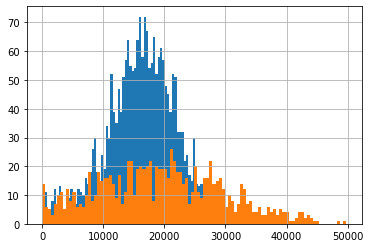

In [32]:
print(np.var(monthly_smart['mb_used']))
monthly_smart['mb_used'].hist(bins=100)
monthly_smart['mb_used'].describe()

print(np.var(monthly_ultra['mb_used']))
monthly_ultra['mb_used'].hist(bins=100)
monthly_ultra['mb_used'].describe()

**Тариф Смарт:**
Среднее кол-во мб/мес: 16229,18
<br>Медиана мб/мес: 16531
<br>Дисперсия мб/мес: 34530412,73
<br>Стандартное отклонение мб/мес: 5877,57

**Тариф Ультра:**
Среднее кол-во мб/мес: 19486,90
<br>Медиана мб/мес: 19324
<br>Дисперсия мб/мес: 101832133,10
<br>Стандартное отклонение мб/мес: 10096,31

**Рассмотрим данные о смс:**

796.455482917076
2282.946075394882


count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

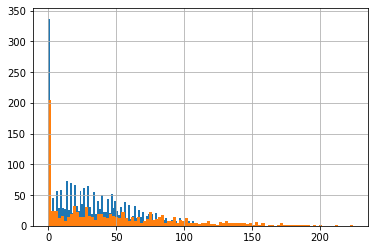

In [33]:
print(np.var(monthly_smart['messages']))
monthly_smart['messages'].hist(bins=100)
monthly_smart['messages'].describe()

print(np.var(monthly_ultra['messages']))
monthly_ultra['messages'].hist(bins=100)
monthly_ultra['messages'].describe()

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Если интересно, то это распределение Пуассона
</div>

**Тариф Смарт:**
Среднее кол-во смс/мес: 33
<br>Медиана смс/мес: 28
<br>Дисперсия смс/мес: 796,45
<br>Стандартное отклонение смс/мес: 28,22

**Тариф Ультра:**
Среднее кол-во смс/мес: 49.36
<br>Медиана смс/мес: 38
<br>Дисперсия смс/мес: 2282.94
<br>Стандартное отклонение смс/мес: 47.80

**Рассмотрм данные о минутах разговора:**

36203.06665209469
100771.2236172022


count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration, dtype: float64

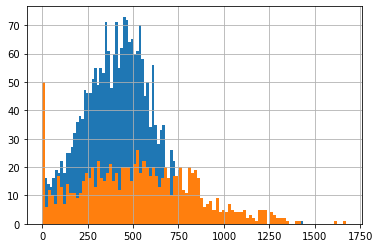

In [34]:
print(np.var(monthly_smart['duration']))
monthly_smart['duration'].hist(bins=100)
monthly_smart['duration'].describe()

print(np.var(monthly_ultra['duration']))
monthly_ultra['duration'].hist(bins=100)
monthly_ultra['duration'].describe()

**Тариф Смарт:**
Среднее кол-во мин/мес: 417,93
<br>Медиана мин/мес: 422
<br>Дисперсия мин/мес: 36203
<br>Стандартное отклонение мин/мес: 190,31

**Тариф Ультра:**
Среднее кол-во мин/мес: 526.62
<br>Медиана мин/мес: 518
<br>Дисперсия мин/мес: 100771.22
<br>Стандартное отклонение мин/мес: 317.60

**Вывод:**

<br>Пользователи тарифа Смарт используют почти все предоставленные им пакеты минут и интернета, причем иногда приходится докупать дополнительные пакеты минут/гигабайт интернета, в связи с превышением лимитов по тарифу.

<br>Смс редко пользуются представители обоих тарифов - т.к. существует множество мессенджеров, позволяющее не пользоваться смс-сообщениями.

<br>У пользователей тарифа Ультра показатели больше по всем пакетам - минуты, смс, интернет-трафик, при этом им почти не приходится прибегать к покупке дополнительных пакетов услуг.

**Шаг 4. Проверьте гипотезы**

**1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

Нулевая гиптеза - средняя выручка пользователей тарифов "Ультра" и "Смарт" равна

Альтернативная гипотеза - средняя выручка пользователей обоих тарифов различается

In [35]:
ultra = data_grpd.query('tariff == "ultra"')['revenue']
smart = data_grpd.query('tariff == "smart"')['revenue']

alpha = 0.05

results = st.ttest_ind(ultra, smart, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


In [36]:
data_grpd[data_grpd['tariff'] == 'smart']['revenue'].median()

1038.0

In [37]:
data_grpd[data_grpd['tariff'] == 'smart']['revenue'].mean()

1294.6393001345896

In [38]:
data_grpd[data_grpd['tariff'] == 'ultra']['revenue'].median()

1950.0

In [39]:
data_grpd[data_grpd['tariff'] == 'ultra']['revenue'].mean()

2071.0659898477156

По тарифу Смарт: 
<br>Среднее: 1294,63 руб.
<br>Медиана: 1038 руб.

<br>По тарифу Ультра:
<br>Среднее: 2071,06 руб.
<br>Медиана: 1950 руб.

**Вывод:**<br>
<br>Среднее и медиана по выручкам различаются почти в два раза, пользователи тарифа "Смарт" при абонентской плате в 550 руб. заплатит почти в два раза больше за счет подключения дополнительных пакетов услуг, что редкость для абонентов тарифа "Ультра".
<br>Средняя выручка пользователей тарифов **различается**.

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Верно, здорвоо, что указываешь `False` для `equal_var`, с ним метод ведёт себя в среднем лучше: https://en.wikipedia.org/wiki/Welch%27s_t-test
    
    
Ниже опять же, если бы ты смержил с пользователями, то так делать бы не пришлось
</div>

**2. средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.**

In [40]:
for user in data_grpd.index:
    data_grpd.loc[user, 'city'] = users.loc[user[0]-1000, 'city']
    
data_grpd

duration  calls  messages  mb_used tariff  gb_used  revenue  \
user_id month                                                                
1000    5.0       159.0   22.0      22.0   2256.0  ultra      3.0   1950.0   
        6.0       172.0   43.0      60.0  23257.0  ultra     23.0   1950.0   
        7.0       340.0   47.0      75.0  14016.0  ultra     14.0   1950.0   
        8.0       408.0   52.0      81.0  14070.0  ultra     14.0   1950.0   
        9.0       466.0   58.0      57.0  14581.0  ultra     15.0   1950.0   
...                 ...    ...       ...      ...    ...      ...      ...   
1489    9.0         0.0    0.0      32.0  17232.0  smart     17.0    950.0   
        10.0        0.0    0.0      21.0  19588.0  smart     20.0   1550.0   
        11.0        0.0    0.0      20.0  17516.0  smart     18.0   1150.0   
        12.0        0.0    0.0      35.0  17341.0  smart     17.0    950.0   
1476    4.0         0.0    0.0       0.0    531.0  ultra      1.0   1950.0   

                          city  
user_id month                   
1000    5.0          Краснодар  
        6.0          Краснодар  
        7.0          Краснодар  
        8.0          Краснодар  
        9.0          Краснодар  
...                        ...  
1489    9.0    Санкт-Петербург  
        10.0   Санкт-Петербург  
        11.0   Санкт-Петербург  
        12.0   Санкт-Петербург  
1476    4.0             Москва  

[3214 rows x 8 columns]

Нулевая гипотеза - средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [41]:
msc = data_grpd.query('city == "Москва"')['revenue']
not_msc = data_grpd.query('city != "Москва"')['revenue']

alpha = 0.05

results = st.ttest_ind(msc, not_msc, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу


In [42]:
data_grpd[data_grpd['city'] == 'Москва']['revenue'].median()

1750.0

In [43]:
data_grpd[data_grpd['city'] == 'Москва']['revenue'].mean()

1550.8052373158755

In [44]:
data_grpd[data_grpd['city'] != 'Москва']['revenue'].median()

1587.0

In [45]:
data_grpd[data_grpd['city'] != 'Москва']['revenue'].mean()

1528.3169419900116

По Москве: 
<br>Среднее: 1550,80 руб.
<br>Медиана: 1750 руб.

<br>По регионам:
<br>Среднее: 1528,31 руб.
<br>Медиана: 1587 руб.

**Вывод:**<br>
<br>Среднее и медиана в Москве практически не отличается от данных в регионах.
<br>Нулевую гипотезу о том, что выручка пользователей из Москвы равна выручке пользователей из регионов, отвергнуть не удалось.

**Общий вывод:**<br>
<br>Пользователи тарифа Смарт используют практически все предоставленные им пакеты услуг и в большинстве случаев им не хватает предоставленных лимитов, что приводит в итоге к покупке дополнительных пакетов услуг. В результате этого они переплачивают почти в два раза относительно изначальной цены тарифа.
<br>Пользователи тарифа Ультра переплачивают за тариф, т.к. в большинстве случаев они не ипользуют большую часть предоставленных им лимитов по тарифу.
<br>Нет существенной разницы между пользователями из Москвы и пользователями других регионов - в среднем все платят одинаково.

<br>По поводу того, какой тариф лучше, на мой взгляд для оператора лучше Ультра - т.к. больше абонентская плата, а пользователи неполностью пользуются всеми предоставленными пакетами услуг, а также не так ограничены и более свободны в использовании различных услуг. Но все-таки мое мнение, что лучше разработать третий тариф, который будет представлять что-то среднее между Ультра и Смарт, т.к. судя по данным, в этом есть потребность - пользователи Смарта все равно в итоге переплачивают, а пользователи Ультра не пользуются на полную всеми предоставленными возможностями и платят больше, чем фактически пользовались. Это поможет привлечь и новых клиентов, и удержать уже существующих, которые по вышеперечисленным причинам могут задуматься о смене оператора с более гибким тарифным планом.

<div class="alert alert-warning">
<h2>Комментарий ревьюера</h2>

Верно, но условный заказчик хотел, чтобы ему определили наиболее перспективный тариф :) "Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше."
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера V.2</h2>

👍 Да, третий тариф это хорошая идея, ну и формально не зная затраты оператора на тарифы тяжело судить какой для него лучше, но по среднему доходу получается ультра, да, но на практике не только средних доход интересует
</div>